# Computational physics 2, Exercise 1

## Random Number Generators
The traditional random number generator (RNG) in computer science generates a sequence of the form
Xn+1 = (aXn + c) mod k. (1)

(a) Verify the point made in the lecture that such pseudo-random numbers are highly correlated.

(b) Try k = 256 and k = 1024 and choose good parameters for a and c. Can you explain the behavior?

(c) The performance of a bad RNG can be vastly improved by coupling two bad RNGs. We want to
study this possibility. Run two differently seeded versions (also try to use different a, c, and k) of
the above bad RNG. A random number from RNG 1 is only taken if RNG 2 produces a number
that is a multiple of either 2, 3, 5, 7, or 13. Study the correlation of this new RNG

In [9]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
print("Imported numpy and matplotlib")

Imported numpy and matplotlib


In [3]:
from typing import Iterator
def linear_congruential_rng(x0: int, a: int, c: int, k: int) -> Iterator[int]:
    x = x0
    while True:
        x = (a*x + c) % k
        yield x

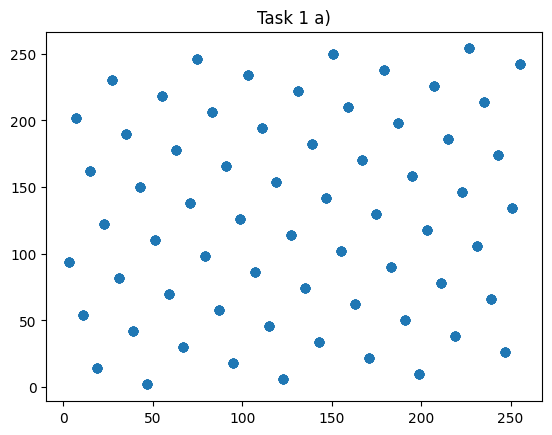

In [11]:
rng = linear_congruential_rng(10, 27, 13, 256)
random_pairs = [(next(rng), next(rng)) for _ in range(512)]
random_x = [p[0] for p in random_pairs]
random_y = [p[1] for p in random_pairs]

plt.figure()
plt.title("Task 1 a)")
plt.scatter(random_x, random_y)

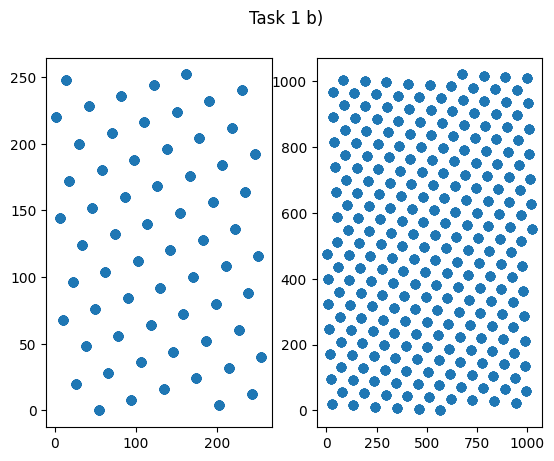

In [13]:
rng_256 = linear_congruential_rng(0, 237, 2, 256)
random_pairs_256 = [(next(rng_256), next(rng_256)) for _ in range(2048)]
random_x_256 = [p[0] for p in random_pairs_256]
random_y_256 = [p[1] for p in random_pairs_256]

rng_1024 = linear_congruential_rng(0, 237, 2, 1024)
random_pairs_1024 = [(next(rng_1024), next(rng_1024)) for _ in range(2048)]
random_x_1024 = [p[0] for p in random_pairs_1024]
random_y_1024 = [p[1] for p in random_pairs_1024]

plt.figure()
plt.suptitle("Task 1 b)")
plt.subplot(1,2,1)
plt.scatter(random_x_256, random_y_256)
plt.subplot(1,2,2)
plt.scatter(random_x_1024, random_y_1024)
